----- First 5 rows -----
   PatientID  Age  Gender       City        Condition  SystolicBP  \
0       1001   69    Male       Pune  General Checkup         150   
1       1002   32    Male   Hubballi     Hypertension         110   
2       1003   89  Female   Hubballi  General Checkup         168   
3       1004   78  Female       Pune         Diabetes         120   
4       1005   38  Female  Bengaluru           Asthma         136   

   DiastolicBP  HeartRate  BloodSugar   BMI   SmokingStatus  \
0          102         88         146  26.6  Current smoker   
1           63         75         157  24.1  Current smoker   
2           81         88          83  23.5  Current smoker   
3           91         56         232  23.9      Non-smoker   
4           74         88          81  32.9   Former smoker   

           HospitalName   VisitDate  TreatmentCost             Outcome  
0  Global Health Center  2024-01-24         3921.0           Recovered  
1       Sunrise Medical  2024-03-22

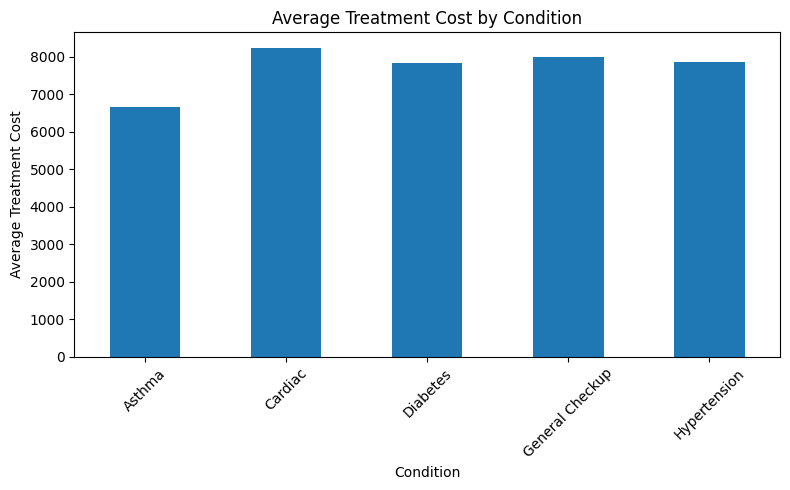

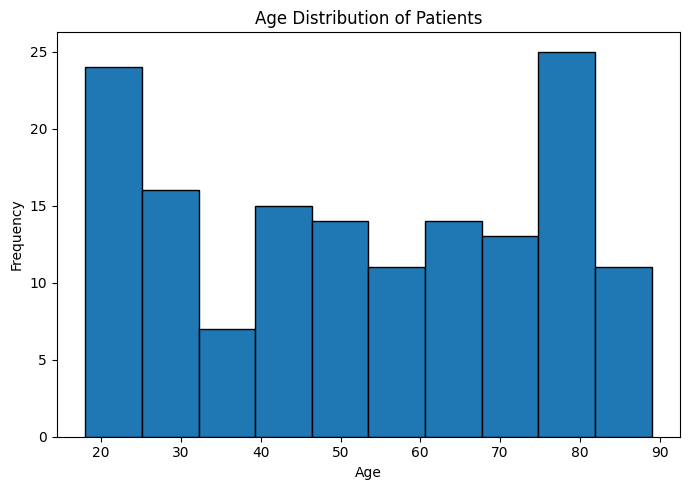

C:\Users\Moinuddin\AppData\Local\Temp\ipykernel_18552\2005359621.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=smoking_statuses)


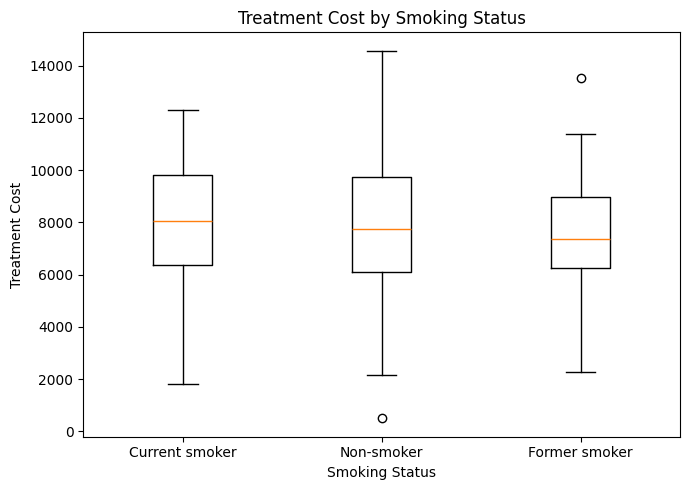

In [10]:
# 1. Load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
# If your file is in the same folder, this is enough.
df = pd.read_csv("healthcare_patient_visits.csv")

# Optional: show first few rows
print("----- First 5 rows -----")
print(df.head())

# 2. Basic cleaning checks (missing values)
print("\n----- Info -----")
print(df.info())

print("\n----- Missing values in each column -----")
print(df.isnull().sum())

# If you want to drop rows with any missing values, uncomment this:
# df = df.dropna()

# Or fill missing values (example: fill numeric with mean)
# df = df.fillna(df.mean(numeric_only=True))


# 3. Simple analytics

# a) Average treatment cost by condition
avg_cost_by_condition = df.groupby("Condition")["TreatmentCost"].mean()
print("\n----- Average Treatment Cost by Condition -----")
print(avg_cost_by_condition)

# b) Patients count by city
patients_count_by_city = df["City"].value_counts()
print("\n----- Patients Count by City -----")
print(patients_count_by_city)

# c) Average BP by condition
# Create an Average BP column from SystolicBP and DiastolicBP
df["AvgBP"] = (df["SystolicBP"] + df["DiastolicBP"]) / 2

avg_bp_by_condition = df.groupby("Condition")["AvgBP"].mean()
print("\n----- Average Blood Pressure (Avg of Systolic & Diastolic) by Condition -----")
print(avg_bp_by_condition)


# 4. Visualizations

# a) Bar chart: average treatment cost by condition
plt.figure(figsize=(8, 5))
avg_cost_by_condition.plot(kind="bar")
plt.title("Average Treatment Cost by Condition")
plt.xlabel("Condition")
plt.ylabel("Average Treatment Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b) Histogram: Age distribution
plt.figure(figsize=(7, 5))
plt.hist(df["Age"], bins=10, edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# c) Boxplot: Treatment cost by smoking status
plt.figure(figsize=(7, 5))

# Prepare data: list of costs for each smoking status
smoking_statuses = df["SmokingStatus"].unique()
data_to_plot = [df[df["SmokingStatus"] == status]["TreatmentCost"] for status in smoking_statuses]

plt.boxplot(data_to_plot, labels=smoking_statuses)
plt.title("Treatment Cost by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Treatment Cost")
plt.tight_layout()
plt.show()
